# 3. Start of the bisection method for finding roots of a parabolic function, using the quadratic x^2-4 as a test base.

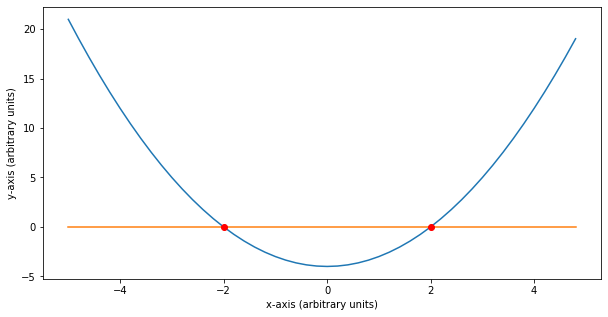

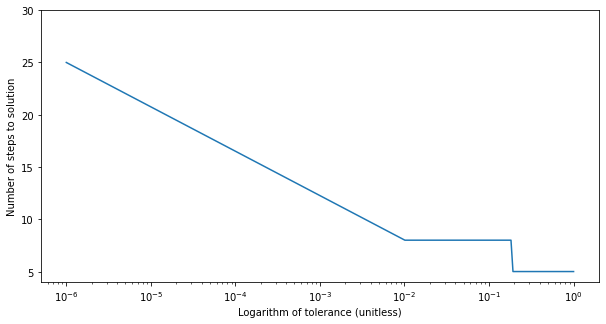

In [ ]:
import matplotlib.pylab as plt
import numpy as np
from math import log10

# CONSTANTS
#quadratic coefficients
a = 1
b = 0
c = -4
#roots are +/- 2

# Initial values to test
x1 = 0
x3 = 25
x2 = (x1+x3)/2

#bisection method
tolerance = 0.001

# FUNCTIONS
def quadratic(a, b, c): # 
    '''creates quadratic function with specified coefficients'''
    def F(x):
        return (a*x**2 + b*x + c)
    return F

def bisection_method(quadfunc, x1, x2, x3, tolerance):
    ''' finds a root of given quadratic function, and the number of steps taken to find that root'''
    nsteps = 0 # number of steps to get to solution
    while abs(quadfunc(x2)) > tolerance:
        nsteps += 1
        if   qfunc(x2) > 0:
            x3 = x2
        elif qfunc(x2) < 0:
            x1 = x2
        x2 = (x1+x3)/2
    return (x2, nsteps)

def find_roots(quadfunc, x1, x2, x3, tolerance):
    ''' 
    finds the two roots of a quadratic function if that function has two real roots
    and calculates the number of steps used to find that solution based on the inputted
    tolerances
    '''
    roots = []
    steps = []
    first_root, first_steps = bisection_method(quadfunc, x1, x2, x3, tolerance)
    roots.append(first_root)
    steps.append(first_steps)
    # I really hate hardcoding this.
    if first_root > 0: # found a positive root, check above and below
        x3 = -25 # to avoid finding the same root
        x2 = (x1+x3)/2
    second_root, second_steps = bisection_method(quadfunc, x1, x2, x3, tolerance)
    roots.append(second_root)
    steps.append(second_steps)
    return (roots, steps[0]) # only returns the first steps because it doesn't help the graph and they're the same number of steps

# RESULTS

qfunc = quadratic(a, b, c) #setting up the quadratic for use

#ensure start values are decent
if qfunc(x1) > 0 or qfunc(x3) < 0: # or
    print("x1 and x2 are inappropriate, please make the qfunc(x1) function negative and the qfunc(x3) function positive")
    print("The bisection method only works under these parameters")
    print("The operation will continue but you will get an infinite loop")
    #exit (0) #this breaks my kernel for some reason

roots, steps = find_roots(qfunc, x1, x2, x3, tolerance)

tolerances = np.linspace(1, 0.000001, 100) # generate tolerances to run through
steps = []
for t in tolerances:
    r, s = find_roots(qfunc, x1, x2, x3, t)
    steps.append(s) # don't need to create a log array, handled by plot axis


#plot functions
quadplot, ax1 = plt.subplots(figsize=(10, 5))
#https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
#needed  to set up this variable so I can have two plots
x = np.arange(-5.0, 5.0, 0.2)
ax1.plot(x, a * x * x + b * x + c, label='Quadratic')
ax1.plot(x, 0.0 * x, label='x-axis')
ax1.plot(roots[0], qfunc(roots[0]),'ro', label='Roots')
ax1.plot(roots[1], qfunc(roots[1]),'ro')
ax1.set_xlabel("x-axis (arbitrary units)")
ax1.set_ylabel("y-axis (arbitrary units)")
#ax1.legend()

#to make a new plot
logplot, ax2 = plt.subplots(figsize=(10, 5))
ax2.set_xscale('log')
ax2.set_ylim(4, 30)
#ax1.set_xlim(0, -6)
ax2.set_xlabel("Logarithm of tolerance (unitless)")
ax2.set_ylabel("Number of steps to solution")
#ax2.set_title("Number of steps to solution vs logarithm of tolerances \n in bisection method")
ax2.plot(tolerances,steps) # plot functions handle the log aspect

# 5. Python script to find the minima of a potential energy function

minimum found with newton-raphson algorithm 0.23605384840262517


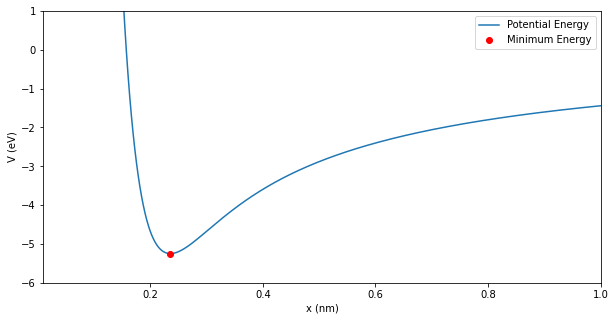

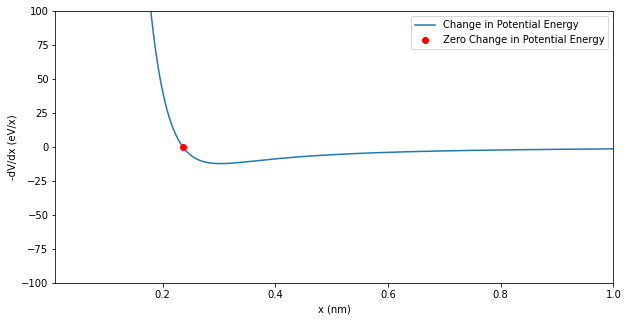

In [ ]:
# https://scipy-lectures.org/packages/sympy.html
# https://www.sympy.org
from scipy.constants import pi, epsilon_0, e
import matplotlib.pylab as plt
from sympy import Symbol, diff, exp, plot, lambdify
from numpy import arange

# CONSTANTS
D = 1.44  # eV*nm, is e^2/(4*pi*e_0)
A = 1090  # eV
p = 0.033 # nm

# RESULTS
# Set up as a sympy function for clarity of code.
x = Symbol('x')
V = A*exp(-x/p) - D*(1/x)
Vprime = diff(V)           # hand-calculated as -A/p*exp(-x/p)    +  D*(1/x**2)
Vprimeprime = diff(Vprime) # hand-calculated as  A/p**2*exp(-x/p) - 2D*(1/x**3)

# lambda functions so we can get back to numerical values
# https://docs.sympy.org/dev/modules/utilities/lambdify.html#module-sympy.utilities.lambdify
lam_v   = lambdify(x, V)
lam_vp  = lambdify(x, Vprime)
lam_vpp = lambdify(x, Vprimeprime)

x_range = arange(0.01, 1, 0.001) # in nm
# Effectively calls the lambda functions above with all the x-values 
# in x_range and makes them an np.array for use.
y_range_v   = lam_v(x_range)
y_range_vp  = lam_vp(x_range)
y_range_vpp = lam_vpp(x_range)

# plot functions 
# Gotta be a better way of doing this
#ax1, peng = plt.subplots() # Potential energy plot # no longer necessary
#ax2, dpeng = plt.subplots() # -dV/dx plot # no longer necessary
ax3, min_peng = plt.subplots(figsize=(10, 5)) # Minimum Energy plot
ax4, dmin_peng = plt.subplots(figsize=(10, 5)) # Minimum Energy plot

x_initial = 0.2 # intial x with tolerances
tolerance = 0.0001

def Newton_Rhapson(tol,x):
    '''
    Modified Newton Raphson algorithm to work with lamdify for the potential energy and derivative functions
    '''
    while abs(lam_vp(x)) >tol :
        x=x- lam_vp(x)/lam_vpp(x)
    return(x)

min = Newton_Rhapson(tolerance,x_initial)
print("minimum found with newton-raphson algorithm", min)

# plot settings per plot
min_peng.plot(x_range, y_range_v, label='Potential Energy')
min_peng.plot(min, lam_v(min), 'ro', label = 'Minimum Energy')
min_peng.set_xlabel("x (nm)")
min_peng.set_ylabel("V (eV)")
min_peng.set_xlim(0.01, 1)
min_peng.set_ylim(-6, 1)
min_peng.legend()

dmin_peng.plot(x_range, -1*y_range_vp,label='Change in Potential Energy') # -1* so that it's -dV/dx as required
dmin_peng.plot(min, lam_vp(min), 'ro', label = 'Zero Change in Potential Energy')
dmin_peng.set_xlabel("x (nm)")
dmin_peng.set_ylabel("-dV/dx (eV/x)")
dmin_peng.set_xlim(0.01, 1)
dmin_peng.set_ylim(-100, 100)
dmin_peng.legend()
